# Análise Exploratória Desafio Graph Missing Edges
-   Dados:

    -   Node attributes:
    
        -   id - numeric id of node

        -   label - alphanumeric id of a node - venue id

        -   latitude - venue latitude

        -   longitude - venue longitude

        -   reviewCount - venue review count

        -   categories - ids of venue categories. Their names can be found in a separated file: categories.csv

        -   name - venue name

        -   stars - venue star number

    -   Edge atributes:

        -   weight - number of times a certain edge was created
        
    -   Categories:

        -   CategoryId - numeric id of a category

        -   names - category name

## Bibliotecas

In [148]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML



%matplotlib inline

# Leitura de Arquivos e Tratamento de Dados

In [149]:
G = nx.read_gml("./../data/GraphMissingEdges.gml")

In [150]:
categories_nodes = nx.get_node_attributes(G,'categories')
for key in categories_nodes:
    categories_nodes[key] = categories_nodes[key].split(',')

In [151]:
categories_df = pd.read_csv('./../data/categories.csv', sep=',')
categories_df = categories_df.set_index('CategoryId')

In [152]:
for node in G.nodes:
    categories = categories_nodes[node]
    categories_names = []
    for category in categories:
        if category != '':
            categories_names.append(categories_df.loc[int(category)]['names'])
    G.nodes[node]['categories_named'] = categories_names

In [153]:
df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
df.drop(['categories'], axis=1, inplace=True)
display(HTML(df.head(5).to_html()))


,longitude,latitude,stars,name,reviewCount,categories_named
ql0AaBp68ckekxvWOF8xLA,-79.992016,40.438701,3.0,Cafe Fifth Ave,20,"[Restaurants, Cafes]"
WHxonk9W_sRLk8cwOoZQqQ,-80.064789,40.436045,4.0,Good Fellas Barber Shop,12,"[Beauty & Spas, Barbers]"
P6HDtlj1GSu9UG2Aal2PPg,-79.979840,40.386165,3.0,Tightspot Dancewear Center,4,"[Shopping, Arts & Crafts, Shoe Stores, Costumes, Fashion]"
3kUqNxO1rkDDb89GAfyNgw,-79.925404,40.457973,4.5,Evolve Wellness Spa Shadyside,95,"[Day Spas, Beauty & Spas, Health & Medical, Acupuncture, Massage Therapy, Massage]"
v_pED2nMFPsBGD4Tq2ygBw,-80.001983,40.438355,2.0,Nova Dental Associates,5,"[Orthodontists, Health & Medical, General Dentistry, Cosmetic Dentists, Oral Surgeons, Dentists]"


## Coeficiente de Clusterização Geral

In [154]:
print(nx.average_clustering(G))

0.04489358044799767


In [155]:
df = df.assign(degree = lambda x: dict(G.degree(x.index)).values())
df = df.assign(clustering = lambda x: nx.clustering(G, x.index))

display(HTML(df.head(5).to_html()))

,longitude,latitude,stars,name,reviewCount,categories_named,degree,clustering
ql0AaBp68ckekxvWOF8xLA,-79.992016,40.438701,3.0,Cafe Fifth Ave,20,"[Restaurants, Cafes]",2,0.00000
WHxonk9W_sRLk8cwOoZQqQ,-80.064789,40.436045,4.0,Good Fellas Barber Shop,12,"[Beauty & Spas, Barbers]",2,0.00000
P6HDtlj1GSu9UG2Aal2PPg,-79.979840,40.386165,3.0,Tightspot Dancewear Center,4,"[Shopping, Arts & Crafts, Shoe Stores, Costumes, Fashion]",1,0.00000
3kUqNxO1rkDDb89GAfyNgw,-79.925404,40.457973,4.5,Evolve Wellness Spa Shadyside,95,"[Day Spas, Beauty & Spas, Health & Medical, Acupuncture, Massage Therapy, Massage]",17,0.07619
v_pED2nMFPsBGD4Tq2ygBw,-80.001983,40.438355,2.0,Nova Dental Associates,5,"[Orthodontists, Health & Medical, General Dentistry, Cosmetic Dentists, Oral Surgeons, Dentists]",0,0.00000


## Histograma do Grau dos Nós

Text(0.5, 1.0, 'Histograma dos Graus dos Nós')

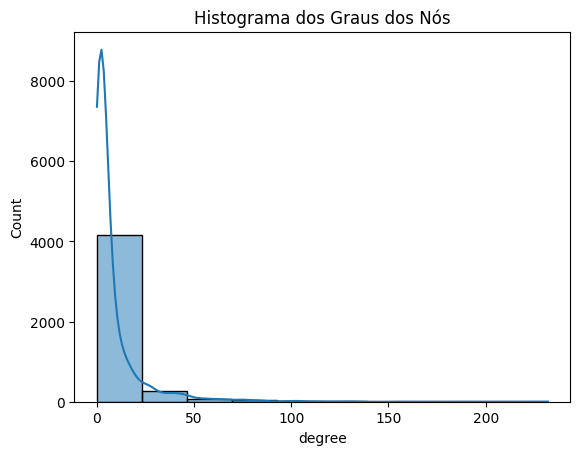

In [156]:
sns.histplot(data=df, x="degree", bins=10, kde=True)
plt.title('Histograma dos Graus dos Nós')

## Histograma do Coeficiente de Clusterização

-   O histograma do coeficiente de cluterização indica que a maior parte dos nós possuem 0 de coeficiente.
-   Como o coeficiente de cluterização indica o grau com que os nós de um grafo tendem a se agrupar. Portando grande parte dos nós não terão links entre si. 

Text(0.5, 1.0, 'Histograma dos Clusters dos Nós')

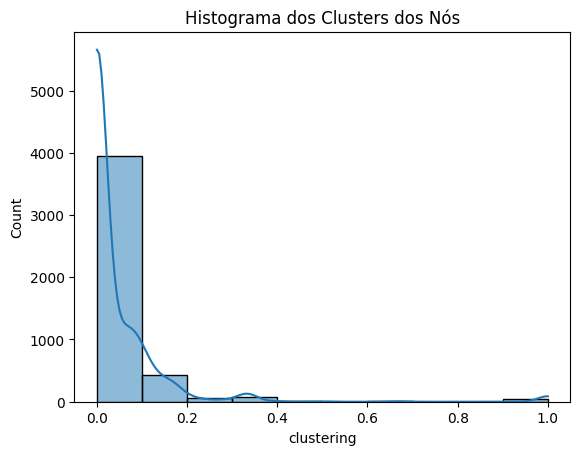

In [157]:
sns.histplot(data=df, x="clustering", bins=10, kde=True)
plt.title('Histograma dos Clusters dos Nós')

Text(0.5, 1.0, 'Histograma de estrelas dos Nós')

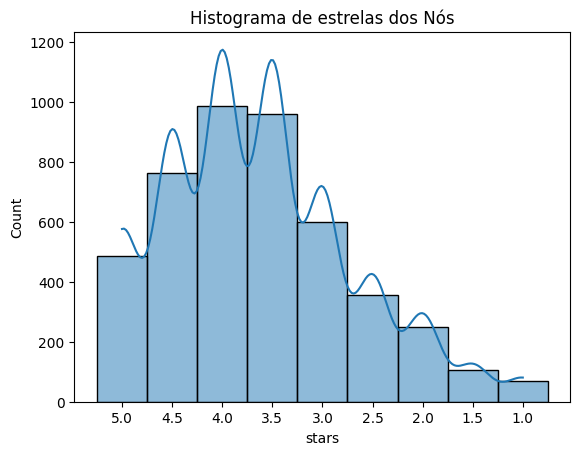

In [158]:
df_by_stars = df.sort_values(by=['stars'], ascending=False)
sns.histplot(data=df_by_stars, x="stars", bins=10, kde=True)
plt.title('Histograma de estrelas dos Nós')

## Densidade do Grafo

-   A densidade do grafo indica que o quão é desconexo.

In [159]:
print(f"density: {nx.density(G)}")

density: 0.0018150582646987846


## Visualização dos Edges

-   Analisando os pesos dos edges, é possível notar que grande parte tem peso 1;
-   Existem conexões que possuem pesos relativamente altos;
-   A conexão de Tako para Gaucho Parrila argentina é a de maior peso;

In [160]:
df_edges = nx.to_pandas_edgelist(G)

df_edges.sort_values(by=['weight'], ascending=False, inplace=True)

for index, row in df_edges.iterrows():
    df_edges.at[index, 'source'] = df.loc[row['source']]['name']
    df_edges.at[index, 'target'] = df.loc[row['target']]['name']

display(HTML(df_edges.head(5).to_html()))

,source,target,weight
8695,täkō,Gaucho Parrilla Argentina,21
2697,Millie's Homemade Ice Cream,Noodlehead,16
8749,täkō,Meat & Potatoes,13
12480,Meat & Potatoes,Gaucho Parrilla Argentina,12
13326,Condado Tacos,Pittsburgh Poke,12


Text(0.5, 1.0, 'Pesos das Arestas')

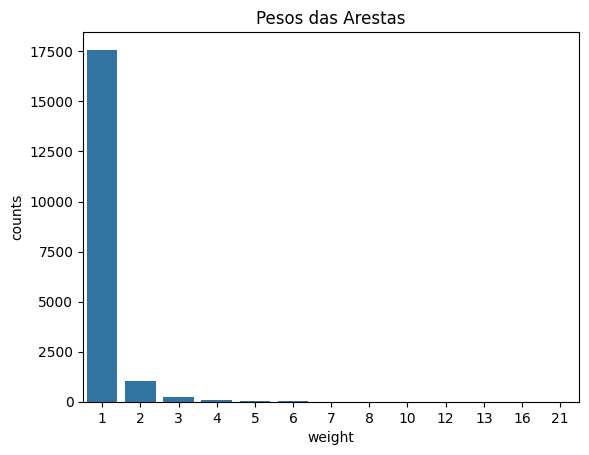

In [161]:
weight_agrp = df_edges.groupby(['weight']).size().reset_index(name='counts')
sns.barplot(x=weight_agrp['weight'], y=weight_agrp['counts'])
plt.title('Pesos das Arestas')

<Axes: xlabel='source', ylabel='counts'>

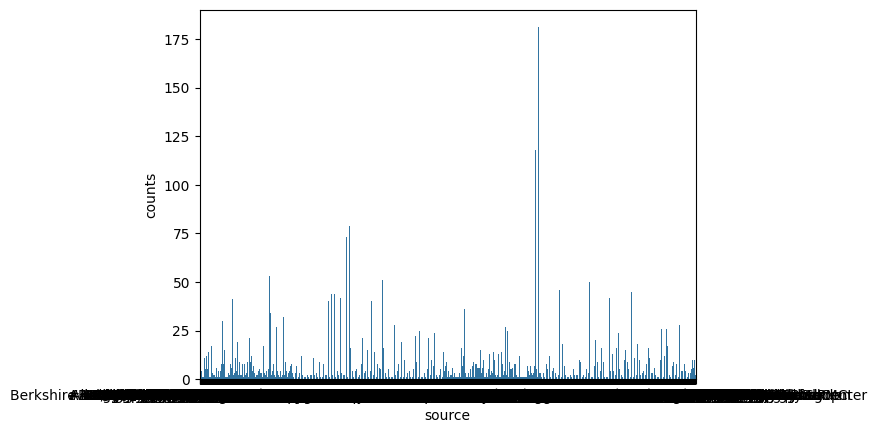

In [162]:
source_agrp = df_edges.groupby(['source']).size().reset_index(name='counts')
sns.barplot(x=source_agrp['source'], y=source_agrp['counts'])

Com os resultados obtidos tanto no desafio, quanto nos exercicios anteriores foi observado que:
- alguns nós na rede de mobilidade tem diversas conexões, porém suas ligações não tem um peso muito grande (sendo a maioria 1), demonstrando que é raro que haja uma interseção grande no conjuntos de pessoas que frequentam dois lugares diferentes nas redes.
- os lugares com valores mais altos nos diferentes tipos de centralidade parecem ser de categorias que sugerem comida tradicional como comidas latinas, tailandesas etc.
- os lugares com valores mais altos nos diferentes tipos de centralidade parecem ser de lugares com avaliação boa avaliação em estrelas.

Próximos passos a serem realizados na analise: 
- cruzar as conexões com a interseção de categorias entre o source e o target, buscando observar se categorias iguais impactam na quantidade de conexões.
- cruzar diferentes features para analisar sua coorelação.
